In [2]:
loan <- read.csv("loan.csv", stringsAsFactors = FALSE)

In [3]:
loanT <- loan

In [4]:
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
remain.col <- names(num.NA)[which(num.NA <= 0.8 * dim(loan)[1])]
loan <- loan[, remain.col]

understand t.test
t.test(x, y = NULL, alternative = c("two.sided", "less", "greater"), 
mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95, ...)
Welch t-test (var.equal = FALSE) and student t-test(var.equal = TRUE)

How to calculate the stats by hand

In [7]:
short_term <- subset(loan, term == ' 36 months')
long_term <- subset(loan, term == ' 60 months')
stderr <- sqrt(var(short_term$int_rate) / dim(short_term)[1] +
                 var(long_term$int_rate) / dim(long_term)[1])
t.score <- (mean(short_term$int_rate) - mean(long_term$int_rate)) / stderr
p.val <- 2 * pt(t.score, df = 467040)

In [8]:
p.val

[1] 0

understand chi-square test

In [9]:
round(with(loan, table(term, grade)) / as.numeric(table(loan$term)), 2)
with(loan, chisq.test(grade, term))

            grade
term            A    B    C    D    E    F    G
   36 months 0.23 0.34 0.26 0.12 0.04 0.01 0.00
   60 months 0.02 0.16 0.31 0.24 0.18 0.07 0.02


	Pearson's Chi-squared test

data:  grade and term
X-squared = 176070, df = 6, p-value < 2.2e-16


In [10]:
apply(with(loan, table(term, grade)), 1, sum) # row sum

36 months  60 months 
    621125     266254

In [11]:
apply(with(loan, table(term, grade)), 2, sum) # col sum

A      B      C      D      E      F      G 
148202 254535 245860 139542  70705  23046   5489

In [12]:
observed <- with(loan, table(term, grade))

In [13]:
observed

            grade
term              A      B      C      D      E      F      G
   36 months 143015 212009 162420  76687  21842   4466    686
   60 months   5187  42526  83440  62855  48863  18580   4803

In [16]:
num.grade <- apply(observed, 2, sum)
perc.term <- apply(observed, 1, sum)/dim(loan)[1]
expected <- rbind(num.grade * perc.term[1], num.grade * perc.term[2])
rownames(expected) <- c('short term', 'long term')
sum((observed - expected)^2/expected)

[1] 176074.8

In [17]:
# For category variables
# (1) if level is not too many, we can use bar chart to check the response at different level first
#     and then use t test to compare. Take home_ownership for example. 

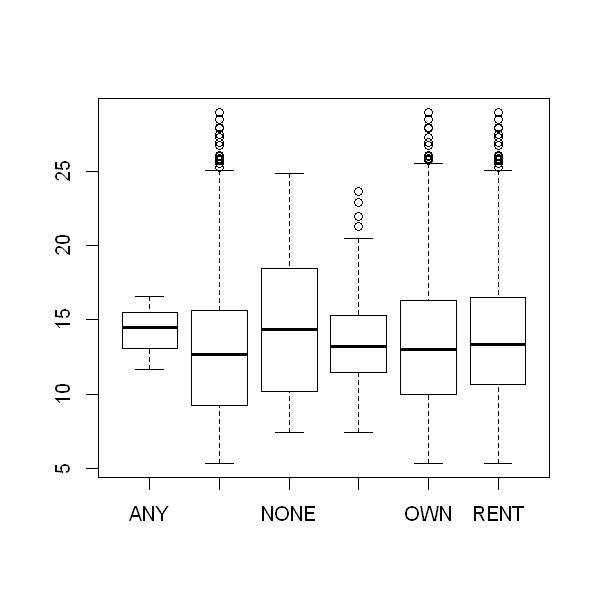

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
boxplot(int_rate ~ home_ownership, loan)

In [24]:
# (2) if category variables has too many levels, Take addr_state for example.
# Disadvantage of using such variable as it is.
# Find similar levels and collapse them
int_state <- by(loan, loan$addr_state, function(x) {return(mean(x$int_rate))})

In [27]:
# we can cluster interest by state into three buckets, and collapse the states accordingly
quantile(int_state)

0%      25%      50%      75%     100% 
11.34583 13.08099 13.28857 13.41240 13.92262

In [28]:
loan$state_mean_int <- 
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <= 13.08099)],'low',
  ifelse(loan$addr_state %in% names(int_state)[which(int_state <= 13.28857)],'medium', 'high'))
table(loan$state_mean_int)


  high    low medium 
350637  77792 458950 

In [29]:
summary(lm(int_rate ~ state_mean_int, loan))#linear model


Call:
lm(formula = int_rate ~ state_mean_int, data = loan)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0785 -3.2485 -0.2185  2.8915 16.0717 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          13.398476   0.007396 1811.57   <2e-16 ***
state_mean_intlow    -0.480143   0.017357  -27.66   <2e-16 ***
state_mean_intmedium -0.211998   0.009823  -21.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.38 on 887376 degrees of freedom
Multiple R-squared:  0.001064,	Adjusted R-squared:  0.001062 
F-statistic: 472.6 on 2 and 887376 DF,  p-value: < 2.2e-16


In [30]:
# Collapsing doesn't only happen to categorical variable, but also to numerical level

In [31]:
table(loan$inq_last_6mths)


     0      1      2      3      4      5      6      7      8      9     10 
497905 241494  94117  37398  10758   3985   1231    195    122     50     24 
    11     12     13     14     15     16     17     18     19     20     24 
    15     15      6      6      9      3      2      4      2      1      2 
    25     27     28     31     32     33 
     1      1      1      1      1      1 

In [32]:
summary(lm(int_rate ~ inq_last_6mths, loan))


Call:
lm(formula = int_rate ~ inq_last_6mths, data = loan)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.3546  -3.3829  -0.2511   2.7571  16.4371 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    12.552878   0.005518  2274.9   <2e-16 ***
inq_last_6mths  0.999086   0.004537   220.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.267 on 887348 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.05182,	Adjusted R-squared:  0.05182 
F-statistic: 4.85e+04 on 1 and 887348 DF,  p-value: < 2.2e-16


In [33]:
loan$inq_last_6mths_cat <- with(loan, ifelse(inq_last_6mths <= 3, as.character(inq_last_6mths),
                                           ifelse(inq_last_6mths <= 10, '3-10', '10+')))

In [34]:
summary(lm(int_rate ~ inq_last_6mths_cat, loan))#to check is there any significant information loss


Call:
lm(formula = int_rate ~ inq_last_6mths_cat, data = loan)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7818  -3.2668  -0.1468   2.7825  16.5532 

Coefficients:
                        Estimate Std. Error  t value Pr(>|t|)    
(Intercept)            12.436781   0.006035 2060.855   <2e-16 ***
inq_last_6mths_cat1     1.330681   0.010560  126.016   <2e-16 ***
inq_last_6mths_cat10+   0.759839   0.505400    1.503    0.133    
inq_last_6mths_cat2     2.341204   0.015135  154.683   <2e-16 ***
inq_last_6mths_cat3     3.131148   0.022832  137.141   <2e-16 ***
inq_last_6mths_cat3-10  3.665024   0.033830  108.337   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.258 on 887344 degrees of freedom
  (29 observations deleted due to missingness)
Multiple R-squared:  0.05562,	Adjusted R-squared:  0.05562 
F-statistic: 1.045e+04 on 5 and 887344 DF,  p-value: < 2.2e-16


In [36]:
# How do we understand data? Let's use dates related features as example.
# There are "" in the last_pymnt_d, why?
head(loan[, c('issue_d', 'last_pymnt_d', 'next_pymnt_d')])

issue_d,last_pymnt_d,next_pymnt_d
Dec-2011,Jan-2015,
Dec-2011,Apr-2013,
Dec-2011,Jun-2014,
Dec-2011,Jan-2015,
Dec-2011,Jan-2016,Feb-2016
Dec-2011,Jan-2015,


In [37]:
dim(subset(loan, next_pymnt_d == ""))

[1] 252971     59

In [38]:
with(subset(loan, next_pymnt_d == ""), table(loan_status)) # either charged off or fully paid
with(subset(loan, next_pymnt_d == "" & last_pymnt_d == ""), table(loan_status)) # all charged off

loan_status
Charged Off  Fully Paid 
      45248      207723 

loan_status
Charged Off 
        527 

In [39]:
with(subset(loan, last_pymnt_d == ""), table(loan_status))

loan_status
                                        Charged Off 
                                                527 
                                            Current 
                                               8326 
                                            Default 
                                                  9 
Does not meet the credit policy. Status:Charged Off 
                                                 12 
                                    In Grace Period 
                                                212 
                                             Issued 
                                               8412 
                                  Late (16-30 days) 
                                                 41 
                                 Late (31-120 days) 
                                                120 

In [42]:
sub1 <- subset(loan, next_pymnt_d == "" & last_pymnt_d == "") # all charged off
sub2 <- subset(loan, next_pymnt_d == "" & last_pymnt_d != "") # charged off or fully paid
sub3 <- subset(loan, next_pymnt_d != "" & last_pymnt_d == "") # 
sub4 <- subset(loan, next_pymnt_d != "" & last_pymnt_d != "")

In [44]:
# One possible interesting question to explore is at which phase, payment is likely to be missed.

In [45]:
library(zoo)
head(loan$issue_d)

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



[1] "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011"

In [46]:
loan$issue_d_1 <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$issue_year <- format(loan$issue_d_1, '%Y')
loan$issue_mon <- format(loan$issue_d_1, '%m')

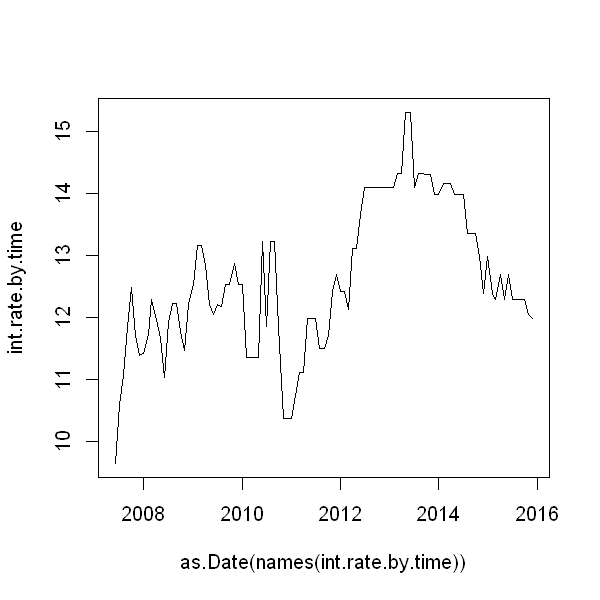

In [50]:
int.rate.by.time <- by(loan, loan$issue_d_1, function(x) {return(median(x$int_rate))})
plot(as.Date(names(int.rate.by.time)), int.rate.by.time, type = 'l')

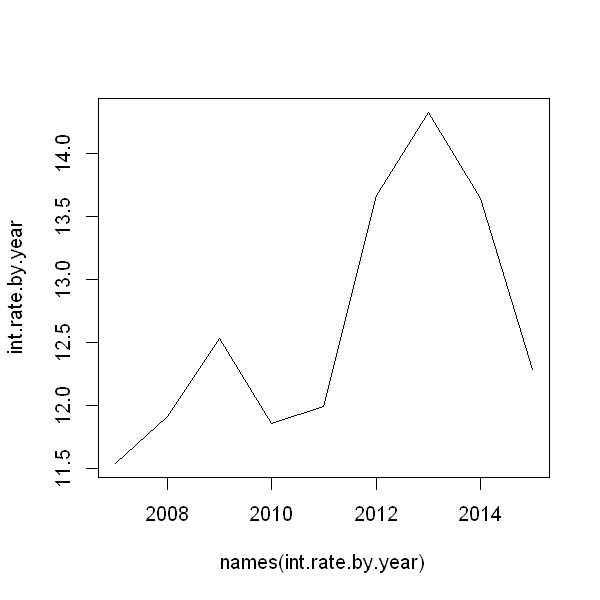

In [49]:
int.rate.by.year <- by(loan, loan$issue_year, function(x) {return(median(x$int_rate))})
plot(names(int.rate.by.year), int.rate.by.year, type = 'l')

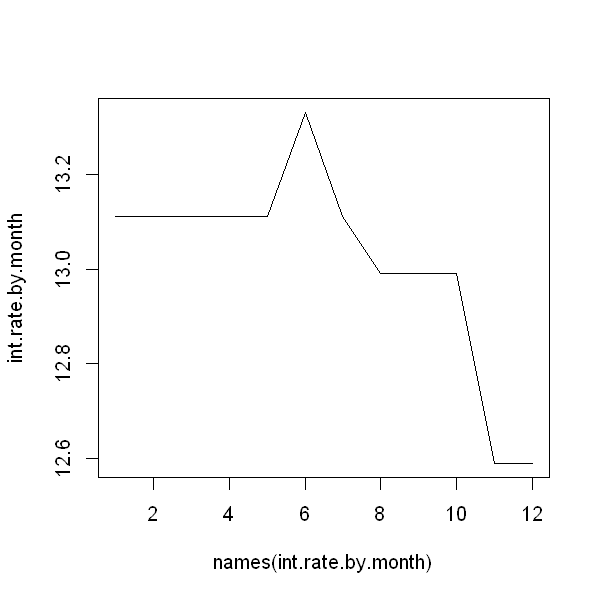

In [51]:
int.rate.by.month <- by(loan, loan$issue_mon, function(x) {return(median(x$int_rate))})
plot(names(int.rate.by.month), int.rate.by.month, type = 'l')

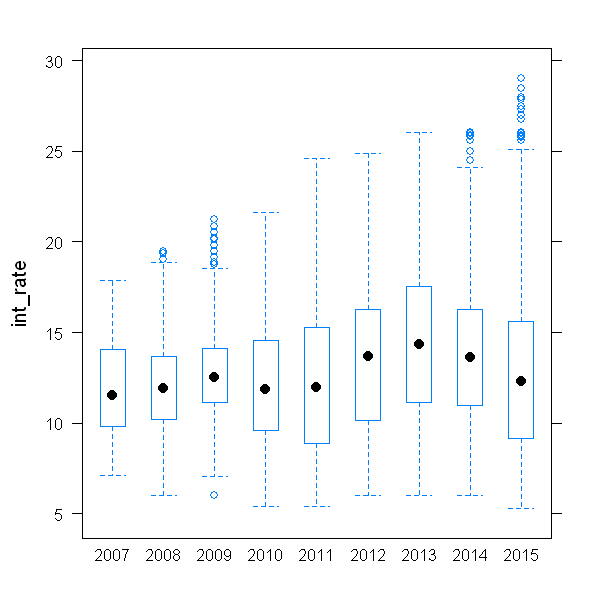

In [52]:
# Not only see the median by time, but also distribution by time.
library(lattice)
bwplot(int_rate ~ issue_year, data = loan)

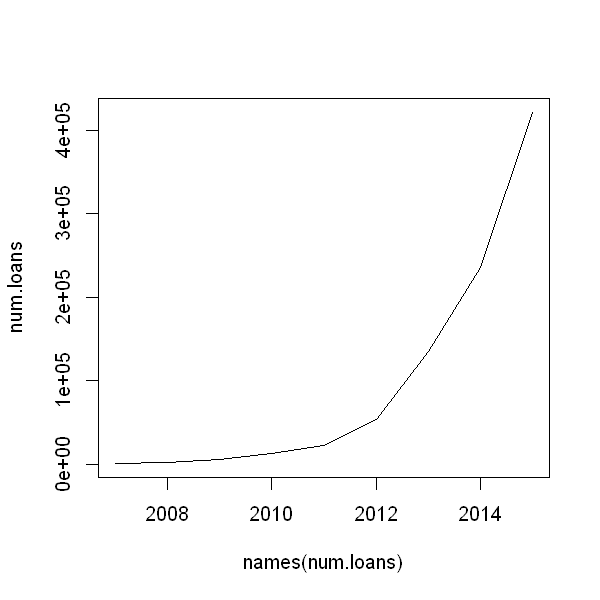

In [53]:
# we can see the spread of certain years are wider than the rest, why? Could be number of loans changed
num.loans <- by(loan, loan$issue_year, function(x) {return(dim(x)[1])})
plot(names(num.loans), num.loans, type = 'l')

In [54]:
loan$issue_d_1 <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$next_pymnt_d_1 <- as.Date(as.yearmon(loan$next_pymnt_d, "%b-%Y"))
loan$last_pymnt_d_1 <- as.Date(as.yearmon(loan$last_pymnt_d, "%b-%Y"))
loan$days_since_issue <- as.numeric(with(loan, next_pymnt_d_1 - issue_d_1))

In [55]:
summary(table(loan$days_since_issue)) # so each loan's data is collected at different time point.

Number of cases in table: 634408 
Number of factors: 1 

In [56]:
loan$months_since_issue <- as.integer(with(loan, next_pymnt_d_1 - issue_d_1)/31)

In [57]:
bad.loan.by.month <- by(loan, loan$months_since_issue, function(x){
  return(dim(subset(x, loan_status %in% c('Charged Off', 'Default', 'Late (16-30 days)',
                                          'Late (31-120 days)')))[1]/dim(x)[1])})

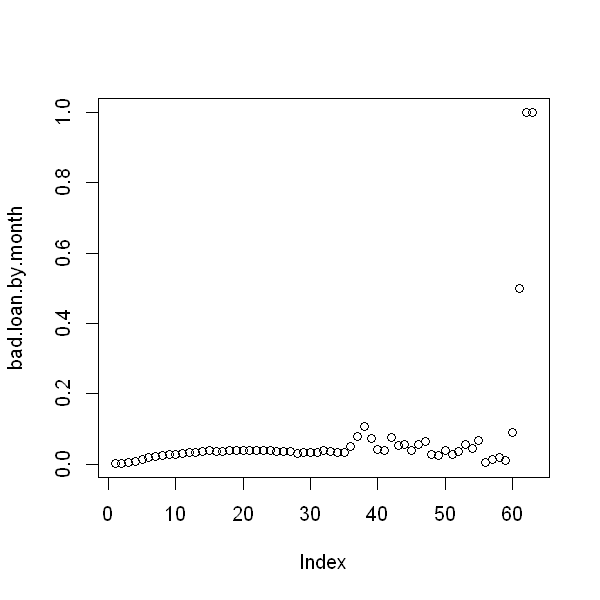

In [58]:
plot(bad.loan.by.month)

In [59]:
# At the end, bad loan rate is crazy, why? Data too few, large noise.

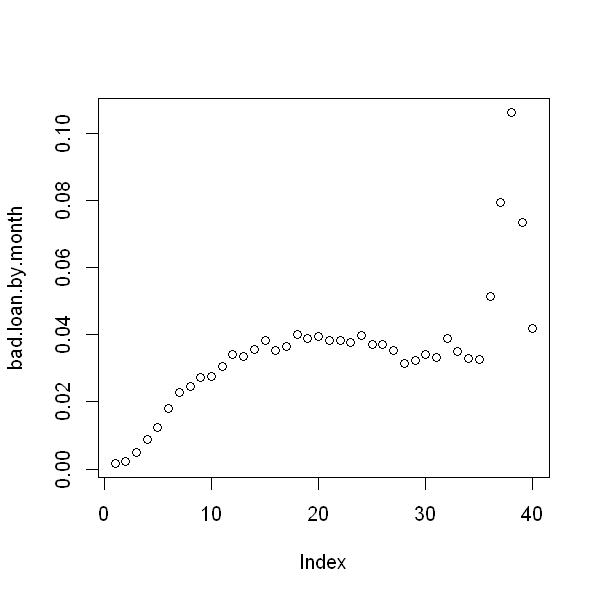

In [63]:
loan$months_since_issue[which(loan$months_since_issue >= 40)] <- 40
bad.loan.by.month <- by(loan, loan$months_since_issue, function(x){
  return(dim(subset(x, loan_status %in% c('Charged Off', 'Default', 'Late (16-30 days)',
                                          'Late (31-120 days)')))[1]/dim(x)[1])})
plot(bad.loan.by.month)

In [64]:
loan$days_btwn_pymnts <- as.numeric(with(loan, next_pymnt_d_1 - last_pymnt_d_1)) # if NA, cuz missing next_pymnt_d
summary(loan$days_btwn_pymnts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   31.00   31.00   36.17   31.00  699.00  270103 

In [65]:
#explore the payment days interval
table(loan$days_btwn_pymnts)


     0     28     29     30     31     60     61     62     90     91     92 
 36848    117     29    519 463195     24    395 105418      5     39   3408 
   120    121    122    123    150    151    152    153    181    182    183 
    21     12    345   3042     20     93     13   2514     17     11     10 
   184    212    214    242    243    244    245    273    274    275    276 
  1013     12     25      9      8      6      8      9      2     10      1 
   303    304    306    334    335    365    366    395    396    426    454 
     3     15      1      9      3      8      3      5      2      8      1 
   456    457    487    548    579    609    610    699 
     6      5      3      1      1      1      1      2 

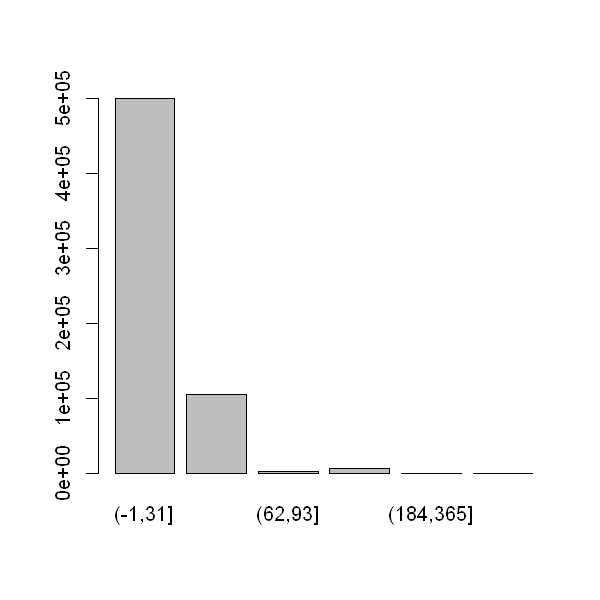

In [66]:
barplot(table(cut(loan$days_btwn_pymnts,
                  breaks = c(-1, 31, 62, 93, 184, 365, 1000))))